# RK4

In [10]:
from numpy import sin,cos ,arange,zeros,empty,array,pi,linspace,meshgrid,sqrt
from numpy.random import normal
from pylab import plot, xlabel, ylabel, show,xlim, ylim,quiver



In [11]:
def f(x,t,*karg):
    return -x**3+sin(t)
# using the *karg allows us to send more parameters if we wish. The code below
# is for a function for dv/dt=-bv-9.8, which simulates drag




In [12]:
def rk4(x0,tpoints):
    h=(tpoints[1]-tpoints[0])
    N=len(tpoints)
    vpoints=zeros(N,float) #This is just an array to store f, which by definition is dx/dt
                            # It sometimes is useful to have this info, but can easily be 
                            #commented out
    xpoints=zeros(N,float)  #Store our solution in an array. Arrays are much more flexible
                            # than lists in what we do
    xpoints[0]=x0            # set the intitial condition to the first point in solution
    for i, t in enumerate(tpoints[:-1]): #enumerate allows us to get both the value of an array
                                    # and the indicies
        x=xpoints[i]
        k1=h*f(x,t)
        k2=h*f(x+.5*k1,t+.5*h)
        k3=h*f(x+.5*k2,t+.5*h)
        k4=h*f(x+k3, t+h)
        xpoints[i+1]=xpoints[i]+(k1+2*k2+2*k3+k4)/6
        vpoints[i]=f(x,t)
    return xpoints,vpoints

In [15]:
#set up our time array
t0=0.       #a in the book, but this makes more sense
tf=10.0   # b in the book, but this makes more sense
N=10      # number of points to integrate
h=(tf-t0)/N   #step size
tpoints=arange(t0,tf,h)
x0=0

solution,vel=rk4(x0,tpoints)
print(solution)

[ 0.          0.43844279  0.85300483  0.63258738  0.17215444 -0.67559646
 -0.60420209 -0.25302044  0.59461874  0.63236316]


In [8]:
#plot the velocity field
plot(vel,solution)
show()

AttributeError: Unknown property projection

the function rk4v2 below allows one to send arguments along to f. This is useful, if you want to iterate through particular constants. 

In [11]:
def f(x,t,*karg):
    if len(karg)!=0:
        b=karg[0]
    else:
        b=0
    return(b*x**2-9.8)

In [20]:
def rk4v2(x0,tpoints,*argv):
    """*argv here sends info onto f(x,argv)"""
    h=tpoints[1]-tpoints[0]
    N=len(tpoints)
    vpoints=zeros(N,float)
    xpoints=zeros(N,float)
    xpoints[0]=x0
    for i,t in enumerate(tpoints[:-1]):
        
        k1=h*f(xpoints[i],t,*argv)
        k2=h*f(xpoints[i]+.5*k1,t+.5*h,*argv)
        k3=h*f(xpoints[i]+.5*k2,t+.5*h,*argv)
        k4=h*f(xpoints[i]+k3, t+h,*argv)
        xpoints[i+1]=xpoints[i]+(k1+2*k2+2*k3+k4)/6
        vpoints[i]=f(xpoints[i],t,*argv)
    return xpoints,vpoints

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  


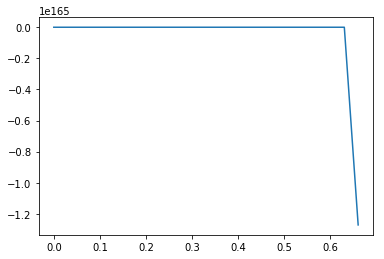

In [21]:
x,v=rk4v2(1,tpoints,-1)
plot(tpoints,x)
show()

One can loop through the drag coeffficient to plot a series of solutions

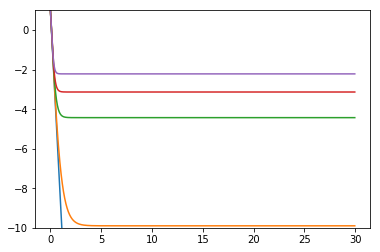

In [22]:
drag_coeff=(0,.1,.5,1,2)
for b in drag_coeff:
    x,v=rk4v2(1,tpoints,b)
    plot(tpoints,x)
ylim(-10,1)  
show()

What follows below is a version of rk4 that allows us to loop through different initial conditions.

In [23]:
def f(x,t,*karg):
    return -x**3+sin(t)

In [24]:
def rk4v3(tpoints,*argv):
    """*argv here is used to loop through different intital conditions"""
    h=tpoints[1]-tpoints[0]
    N=len(tpoints)
    vpoints=zeros(N,float)
    xpoints=zeros(N,float)
    if len(argv)!=0:
        xpoints[0]=argv[0]
    else: xpoints[0]=0    
    for i,t in enumerate(tpoints[:-1]):
        
        k1=h*f(xpoints[i],t)
        k2=h*f(xpoints[i]+.5*k1,t+.5*h)
        k3=h*f(xpoints[i]+.5*k2,t+.5*h)
        k4=h*f(xpoints[i]+k3, t+h)
        xpoints[i+1]=xpoints[i]+(k1+2*k2+2*k3+k4)/6
        vpoints[i]=f(xpoints[i],t)
    return xpoints,vpoints

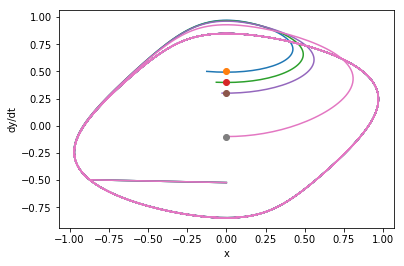

In [25]:
x0=[0.5,0.4,0.3,-.1]
for l in x0:
    x,v=rk4v3(tpoints,l)
    plot(v,x)
    plot(tpoints[0],l,"o")
xlabel("x")
ylabel("dy/dt")
show()

Below is a function for the Lotke-volterra equations. These are two coupled equations
\begin{align}\frac{dx}{dt}&=\alpha x-\beta x y\\
\frac{dy}{dy}&=\gamma x y- \delta y
\end{align}

We send $x$ and $y$ variables as a vector and send back an array. Yay, Python!

In [ ]:
def f2(r,t,args):
    
    if len(args)!=0:
        alpha=args[0]
        beta=args[1]
        gamma=args[2]
        delta=args[3]
    else:
        alpha=1.
        beta=0.5
        gamma=0.5
        delta=2.
    x=r[0]
    y=r[1]
    fx=alpha*x-beta*x*y
    fy=gamma*x*y-delta*y
    return array([fx,fy])

Below is the modification of rk4 that allows for multiple simultaneous equations

In [28]:
def rk4v4(ic,tpoints,*argv):
    N=len(tpoints)
    ypoints=zeros(N,float)
    xpoints=zeros(N,float)
    xpoints[0]=ic[0]
    ypoints[1]=ic[1]
    r=ic
   
    h=tpoints[1]-tpoints[0]
    
   
    for i,t in enumerate(tpoints[:-1]):
        
        k1=h*f2(r,t,*argv)
        k2=h*f2(r+.5*k1,t+.5*h,*argv)
        k3=h*f2(r+.5*k2,t+.5*h,*argv)
        k4=h*f2(r+k3, t+h,*argv)
        r+=(k1+2*k2+2*k3+k4)/6
        xpoints[i+1]=r[0]
        ypoints[i+1]=r[1]
    return array([xpoints,ypoints])

In [ ]:
#set up our time array
t0=0.       #a in the book, but this makes more sense
tf=10.0   # b in the book, but this makes more sense
N=1000     # number of points to integrate
h=(tf-t0)/N   #step size
tpoints=arange(t0,tf,h)

LV_constants=[1,.2,2,2]
sol=rk4v4([2,1],tpoints,LV_constants)

In [ ]:

plot(tpoints,sol[0])
plot(tpoints,sol[1])

show()

In [ ]:
plot(sol[0],sol[1])
show()

In [ ]:
def f2(r,t):
    g=9.81
    k=3.5
    m=.2
    x=r[0]
    
    v=r[1]
    dx=v
    dv=-k/m*x-g
    return array([dx,dv],float)

In [ ]:
sol=rk4v4([-0,0],tpoints)

In [ ]:
plot(tpoints,sol[0])
plot(tpoints,sol[1])
xlabel("time")
ylabel("x,v")
show()

In [ ]:
plot(sol[0],sol[1])
show()

In [ ]:
#set up our time array
t0=0.       #a in the book, but this makes more sense
tf=10.0   # b in the book, but this makes more sense
N=1000      # number of points to integrate
h=(tf-t0)/N   #step size
tpoints=arange(t0,tf,h)
x0=0.

In [101]:
def f2(r,t):
    x=r[0]
    
    y=r[1]
    dx=-4*x-3*y
    dy=2*x+3*y
    return array([dx,dy],float)

In [102]:
#set up our time array
t0=0.       #a in the book, but this makes more sense
tf=2.0   # b in the book, but this makes more sense
N=100    # number of points to integrate
h=(tf-t0)/N   #step size
tpoints=arange(t0,tf,h)
sol=rk4v4([1,1],tpoints)

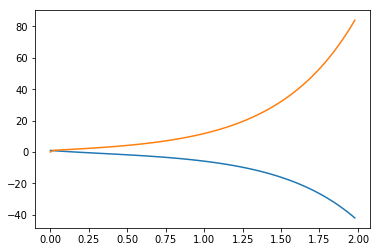

In [103]:
plot(tpoints,sol[0])
plot(tpoints,sol[1])
show()

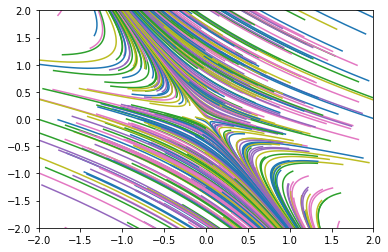

In [106]:
for n in range(500):
    x0=normal()
    y0=normal()
    sol=rk4v4([x0,y0],tpoints)
    plot(sol[0,1:],sol[1,1:])
    plot(x0,y0)
xlim(-2,2)
ylim(-2,2)
show()

In [105]:
y1=linspace(-3,3,10)
y2=linspace(-3,3,10)
U,V=meshgrid(y1,y2)
Y1,Y2=f2([U,V],0)

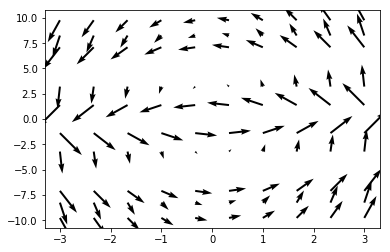

In [100]:

quiver(Y1,Y2,U,V)

show()

In [90]:
def f2(state,time):
    g0=state[1]
    g1=-gravity/Lo*np.sin(state[0])-beta*state[1]+beta*np.cos(omegao*time/3.)
    return np.array([g0,g1])

In [ ]:
sol[2]

In [ ]:
R=4
r=.02
g=9.81
def f(x,t):
    
    return (-r**2*sqrt(2*g*x)/(2*x*R-x**2))

a = 0.0           # Start of the interval
b = 500.0          # End of the interval
N = 1000          # Number of steps
h = (b-a)/N       # Size of a single step
x = 6.0           # Initial condition

tpoints = arange(a,b,h)
xpoints = []
for t in tpoints:
    xpoints.append(x)
    x += h*f(x,t)

plot(tpoints,xpoints)
xlabel("t")
ylabel("x(t)")
show()

In [ ]:

def f(x,t):
    return -x**3 + sin(t)

a = 0.0           # Start of the interval
b = 40.0          # End of the interval
N = 50       # Number of steps
h = (b-a)/N       # Size of a single step
x = .5           # Initial condition
xrk2=.5
tpoints = arange(a,b,h)
xpoints = []
xrk2points=[]
for t in tpoints:
    xpoints.append(x)
    xrk2points.append(xrk2)
    x += h*f(x,t)
    k1=h*f(xrk2,t)
    k2=h*f(xrk2+k1/2,t+h/2)
    xrk2+=k2
plot(tpoints,xpoints)
plot(tpoints,xrk2points)

xlabel("t")
ylabel("x(t)")
show()

In [50]:
def f2(r,t):
    x=r[0]
    y=r[1]
    fx=y*x-x
    fy=y-x*y+sin(t)**2
    return array([fx,fy])

In [66]:
#set up our time array
t0=0.       #a in the book, but this makes more sense
tf=50.0   # b in the book, "\but this makes more sense
N=10000   # number of points to integrate
h=(tf-t0)/N   #step size
tpoints=arange(t0,tf,h)
sol=rk4v4([1,1],tpoints)

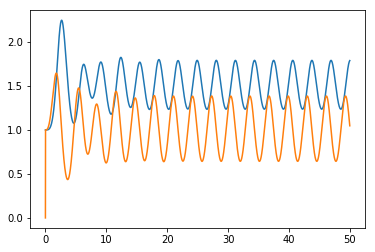

In [67]:
plot(tpoints,sol[0])
plot(tpoints,sol[1])
show()

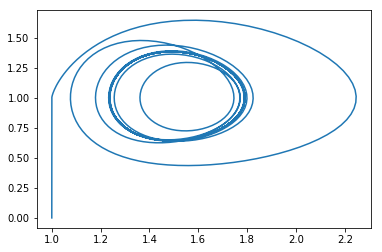

In [65]:
plot(sol[0],sol[1])
show()

In [95]:
def f2(r,t):
    g=9.81
    k=3.5
    m=.2
    theta=r[0]
    
    omega=r[1]
    dx=omega
    dv=-g*sin(theta)
    return array([dx,dv],float)

In [83]:
#set up our time array
t0=0.       #a in the book, but this makes more sense
tf=50.0   # b in the book, "\but this makes more sense
N=10000   # number of points to integrate
h=(tf-t0)/N   #step size
tpoints=arange(t0,tf,h)
sol=rk4v4([0,1],tpoints)

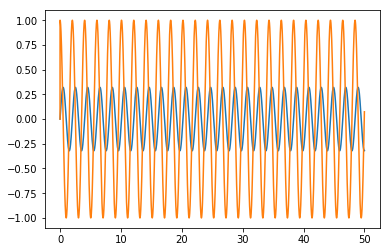

In [84]:
plot(tpoints,sol[0])
plot(tpoints,sol[1])
show()

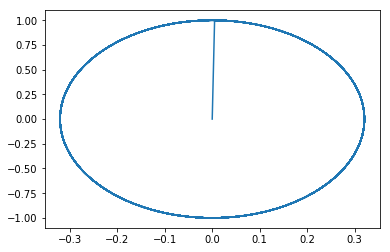

In [86]:
plot(sol[0],sol[1])
show()